# -- Trabalho A3 Inteligência artifical (modelo decision tree implementado) --  

### Importando dependências e bibliotecas: 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from IPython.display import display, HTML
import graphviz
from io import StringIO
import time 

# Definição do nome do arquivo CSV
FILE_NAME = 'vagas_historico.csv' 


# --1. LEITURA DE DADOS E INTRODUÇÃO DO ERRO: --


In [10]:
print("## 1. 📂 Carregamento e Preparação do Dataset Real")

try:
    # Tenta ler o arquivo CSV (que agora NÃO tem 'Exp_Anos')
    df_historico = pd.read_csv(FILE_NAME)
    print(f"Dataset '{FILE_NAME}' carregado com sucesso. Total de linhas: {len(df_historico)}")
except FileNotFoundError:
    print(f"\n⚠️ ERRO: Arquivo '{FILE_NAME}' não encontrado.")
    print("Gerando um dataset simulado para que o código possa ser executado.")
    # Se o CSV não existir, gera um dataset simulado como fallback
    np.random.seed(42)
    n_samples = 150
    
    # 🚨 ALTERAÇÃO: Dataset simulado sem 'Exp_Anos'
    df_historico = pd.DataFrame({
        'Ingles_Avancado': np.random.randint(0, 2, n_samples), 
        'Conhece_Python': np.random.randint(0, 2, n_samples),
        'Tem_Cloud': np.random.randint(0, 2, n_samples),
    })
    
    # 🚨 ALTERAÇÃO: Nova lógica de resultado sem 'Exp_Anos'
    # Lógica: É APTO se (Inglês E Python) OU (Cloud E Python) OU (Inglês E Cloud)
    df_historico['Resultado'] = np.where(
        ((df_historico['Ingles_Avancado'] == 1) & (df_historico['Conhece_Python'] == 1)) |
        ((df_historico['Tem_Cloud'] == 1) & (df_historico['Conhece_Python'] == 1)) |
        ((df_historico['Ingles_Avancado'] == 1) & (df_historico['Tem_Cloud'] == 1)),
        'APTO',
        'NAO_APTO'
    )

    # Variáveis (Features) e Alvo (Target)
# 🚨 ALTERAÇÃO: Remove 'Exp_Anos' da lista de features de treinamento (X)
X = df_historico[['Ingles_Avancado', 'Conhece_Python', 'Tem_Cloud']]
y = df_historico['Resultado']
feature_names = list(X.columns)
class_names = ['APTO', 'NAO_APTO']

# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 1. 📂 Carregamento e Preparação do Dataset Real
Dataset 'vagas_historico.csv' carregado com sucesso. Total de linhas: 200


# --- 2. TREINAMENTO E AVALIAÇÃO DO MODELO ---



In [12]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train) # Modelo treinado sem 'Exp_Anos'

print("-" * 70)
print("## 2. 📉 Métricas de Desempenho (Onde o Erro é Visível)")

# O restante das métricas funciona normalmente
y_pred = clf.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='APTO', zero_division=0)
recall = recall_score(y_test, y_pred, pos_label='APTO', zero_division=0)
cm = confusion_matrix(y_test, y_pred, labels=['APTO', 'NAO_APTO'])

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão (Precisão do APTO): {precision:.4f} ")
print(f"Recall (Sensibilidade): {recall:.4f}")
print("\nMatriz de Confusão:")
display(pd.DataFrame(cm, index=['Real: APTO', 'Real: NÃO APTO'], columns=['Previsto: APTO', 'Previsto: NÃO APTO']))

print("-" * 70)

----------------------------------------------------------------------
## 2. 📉 Métricas de Desempenho (Onde o Erro é Visível)
Acurácia: 0.9500
Precisão (Precisão do APTO): 0.9048 
Recall (Sensibilidade): 1.0000

Matriz de Confusão:


,Previsto: APTO,Previsto: NÃO APTO
Real: APTO,19,0
Real: NÃO APTO,2,19


----------------------------------------------------------------------


## Nesse contexto FN é o erro mais grave. 
    A vaga pode ser excluida mesmo com o usuário estando apto.

### --Acurácia, Precisão e Recall--

- Acurácia : Proporção entre previsões corretas em relação ao total de previsões. 

    TP + TN / TP+TN+FP+FN

- Precisão : Foca na qualidade das previsões positivas, ou seja: 

    "De quantos positivos previstos, são realmente positivos? "

    TP / TP + FP

- Recall : Foca na sensibilidade do modelo a positivos reais.

    "De todos os positivos reais, quais são predições corretas?"
    
    TP / TP + FN





# --- 3. VISUALIZAÇÃO DA ÁRVORE DE DECISÃO ---

## 3. 🌳 Diagrama da Árvore de Decisão


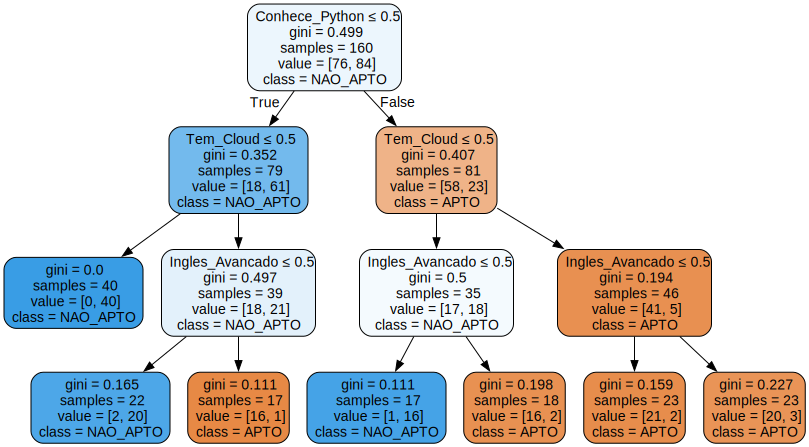

----------------------------------------------------------------------


In [13]:
print("## 3. 🌳 Diagrama da Árvore de Decisão")
# Renderiza o diagrama visual da árvore
# O diagrama agora exibirá apenas as 3 features restantes
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                feature_names=feature_names,
                class_names=class_names,
                filled=True,
                rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data.getvalue())
display(graph)

print("-" * 70)

# --- 4. FILTRAGEM DE NOVAS VAGAS COM VISUALIZAÇÃO DINÂMICA ---



In [ ]:
print("## 4. 🔍 Classificação Dinâmica de Novas Vagas")

# Perfil Fixo do Candidato (Mantido para contexto, mas Exp_Anos não é usado na predição)
perfil_fixo = {'Ingles_Avancado': 0, 'Conhece_Python': 1, 'Tem_Cloud': 0}

print(f"Perfil Fixo do Candidato (Features usadas pelo modelo):")
print(f" - Inglês Avançado: {perfil_fixo['Ingles_Avancado']}")
print(f" - Conhece Python: {perfil_fixo['Conhece_Python']}")
print(f" - Tem Cloud: {perfil_fixo['Tem_Cloud']}")
print("-" * 70)

# Novas Vagas para Classificação (Dados de Produção)
dados_vagas_novas = {
    'ID': [401, 402, 403, 404, 405, 406],
    'Titulo': ['Estágio em análise de dados', 'Estágio Dev Java', 'Estágio cybersecurity', 'Estágio Dev Python', 'Estágio Analista de sistemas', 'Estágio Cloud Engineer'],
    'Ingles_Avancado': [1, 0, 1, 1, 0, 1],   # Exigência de Inglês
    'Conhece_Python': [1, 0, 1, 0, 1, 0],    # Exigência de Python
    'Tem_Cloud': [1, 0, 0, 1, 1, 0]          # Exigência de Cloud
}
df_vagas = pd.DataFrame(dados_vagas_novas)

# Cria a Matriz de Teste (Lógica: Perfil do Candidato atende ou excede a exigência da vaga?)
# 🚨 ALTERAÇÃO: Remove a comparação de 'Exp_Anos' da Matriz de Teste
matriz_teste = pd.DataFrame({
    'Ingles_Avancado': [perfil_fixo['Ingles_Avancado'] >= req for req in df_vagas['Ingles_Avancado']],
    'Conhece_Python': [perfil_fixo['Conhece_Python'] >= req for req in df_vagas['Conhece_Python']],
    'Tem_Cloud': [perfil_fixo['Tem_Cloud'] >= req for req in df_vagas['Tem_Cloud']],
}).astype(int) 

# DataFrame para rastrear o processo
df_processo = df_vagas.copy()
df_processo['Status'] = 'Pendente'
df_processo['Predicao'] = ''

# Loop para análise e visualização dinâmica
for index, row in matriz_teste.iterrows():
    # 1. Predição do modelo para a vaga atual
    vaga_atual_data = np.array(row).reshape(1, -1)
    # A Matriz de Teste (row) agora tem 3 colunas, alinhada com o modelo
    predicao = clf.predict(vaga_atual_data)[0]
    
    # 2. Atualiza o DataFrame de Processo
    df_processo.loc[index, 'Predicao'] = predicao
    df_processo.loc[index, 'Status'] = 'Analisada'
    
    # ... (Restante da lógica de formatação de tabela)
    
    # Use print para ambientes que não suportam display (como Python padrão)
    print(f"\nAnalisando Vaga {df_processo.loc[index, 'ID']}: {df_processo.loc[index, 'Titulo']}")
    # 🚨 ALTERAÇÃO: Remove 'Exp_Anos' da exibição da vaga
    # Se você instalou o 'tabulate', pode usar to_markdown. Se não, use to_string.
    print(df_processo[['Titulo', 'Ingles_Avancado', 'Conhece_Python', 'Tem_Cloud', 'Status', 'Predicao']].to_string(index=False)) 
    print("-" * 15)
    time.sleep(1)

## 4. 🔍 Classificação Dinâmica de Novas Vagas
Perfil Fixo do Candidato (Features usadas pelo modelo):
 - Inglês Avançado: 0
 - Conhece Python: 1
 - Tem Cloud: 0
----------------------------------------------------------------------

Analisando Vaga 401: Estágio em análise de dados
                      Titulo  Ingles_Avancado  Conhece_Python  Tem_Cloud    Status Predicao
 Estágio em análise de dados                1               1          1 Analisada NAO_APTO
            Estágio Dev Java                0               0          0  Pendente         
       Estágio cybersecurity                1               1          0  Pendente         
          Estágio Dev Python                1               0          1  Pendente         
Estágio Analista de sistemas                0               1          1  Pendente         
      Estágio Cloud Engineer                1               0          0  Pendente         
---------------


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Analisando Vaga 402: Estágio Dev Java
                      Titulo  Ingles_Avancado  Conhece_Python  Tem_Cloud    Status Predicao
 Estágio em análise de dados                1               1          1 Analisada NAO_APTO
            Estágio Dev Java                0               0          0 Analisada     APTO
       Estágio cybersecurity                1               1          0  Pendente         
          Estágio Dev Python                1               0          1  Pendente         
Estágio Analista de sistemas                0               1          1  Pendente         
      Estágio Cloud Engineer                1               0          0  Pendente         
---------------


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Analisando Vaga 403: Estágio cybersecurity
                      Titulo  Ingles_Avancado  Conhece_Python  Tem_Cloud    Status Predicao
 Estágio em análise de dados                1               1          1 Analisada NAO_APTO
            Estágio Dev Java                0               0          0 Analisada     APTO
       Estágio cybersecurity                1               1          0 Analisada     APTO
          Estágio Dev Python                1               0          1  Pendente         
Estágio Analista de sistemas                0               1          1  Pendente         
      Estágio Cloud Engineer                1               0          0  Pendente         
---------------


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Analisando Vaga 404: Estágio Dev Python
                      Titulo  Ingles_Avancado  Conhece_Python  Tem_Cloud    Status Predicao
 Estágio em análise de dados                1               1          1 Analisada NAO_APTO
            Estágio Dev Java                0               0          0 Analisada     APTO
       Estágio cybersecurity                1               1          0 Analisada     APTO
          Estágio Dev Python                1               0          1 Analisada NAO_APTO
Estágio Analista de sistemas                0               1          1  Pendente         
      Estágio Cloud Engineer                1               0          0  Pendente         
---------------


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Analisando Vaga 405: Estágio Analista de sistemas
                      Titulo  Ingles_Avancado  Conhece_Python  Tem_Cloud    Status Predicao
 Estágio em análise de dados                1               1          1 Analisada NAO_APTO
            Estágio Dev Java                0               0          0 Analisada     APTO
       Estágio cybersecurity                1               1          0 Analisada     APTO
          Estágio Dev Python                1               0          1 Analisada NAO_APTO
Estágio Analista de sistemas                0               1          1 Analisada     APTO
      Estágio Cloud Engineer                1               0          0  Pendente         
---------------


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Analisando Vaga 406: Estágio Cloud Engineer
                      Titulo  Ingles_Avancado  Conhece_Python  Tem_Cloud    Status Predicao
 Estágio em análise de dados                1               1          1 Analisada NAO_APTO
            Estágio Dev Java                0               0          0 Analisada     APTO
       Estágio cybersecurity                1               1          0 Analisada     APTO
          Estágio Dev Python                1               0          1 Analisada NAO_APTO
Estágio Analista de sistemas                0               1          1 Analisada     APTO
      Estágio Cloud Engineer                1               0          0 Analisada     APTO
---------------


# 5. RESULTADO FINAL (FILTRO)


In [8]:
print("## 5. ✅ Filtro Final de Vagas Aptas")
vagas_aptas = df_processo[df_processo['Predicao'] == 'APTO']
display(vagas_aptas[['Titulo', 'Predicao']].style.hide(axis='index'))

## 5. ✅ Filtro Final de Vagas Aptas


NameError: name 'df_processo' is not defined